In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [71]:

df = pd.read_excel(r"C:\Users\shail\Google Drive\Self\Learning\Analytics Vidhya\Time Series Forecasting\ScrapRate04.xlsx")
#df=df.rename(columns={'ERE AREA':'Production'})
df=df.reset_index(drop=True)
df.drop(['Unnamed: 0'],axis=1, inplace=True)
df.shape, df.head()

((926, 4),
   Job Start Date  Scrape Sale Qty.  Rate in Rs./Kg.  Amount in Rs.
 0     2018-11-10            149.00            13.50        2011.50
 1     2018-11-02            230.00            18.00        4140.00
 2     2018-11-13            325.00            17.00        5525.00
 3     2018-11-21            350.00            17.00        5950.00
 4     2018-08-29            250.00            11.00        2750.00)

In [72]:
df=df.rename(columns={'Job Start Date':'Date', })


In [73]:
#df['Production']=df['Production'].replace(0,df['Production'].mean())

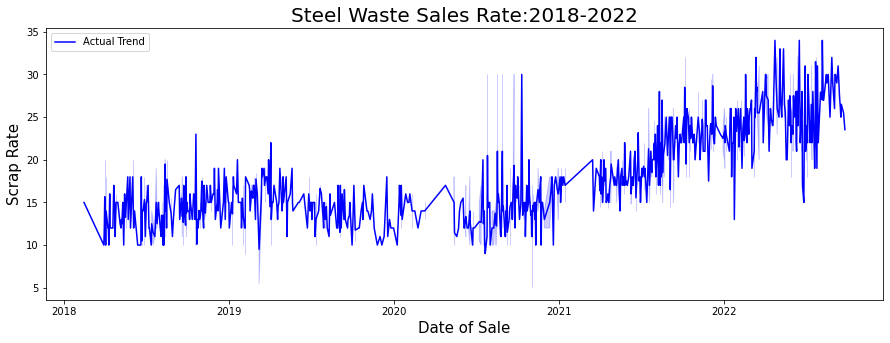

In [74]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Date', y='Rate in Rs./Kg.', data=df, legend=True, color='b', label='Actual Trend')
plt.ylabel('Scrap Rate', fontsize=15)
plt.xlabel('Date of Sale', fontsize=15)
plt.title('Steel Waste Sales Rate:2018-2022', fontsize=20);

No handles with labels found to put in legend.


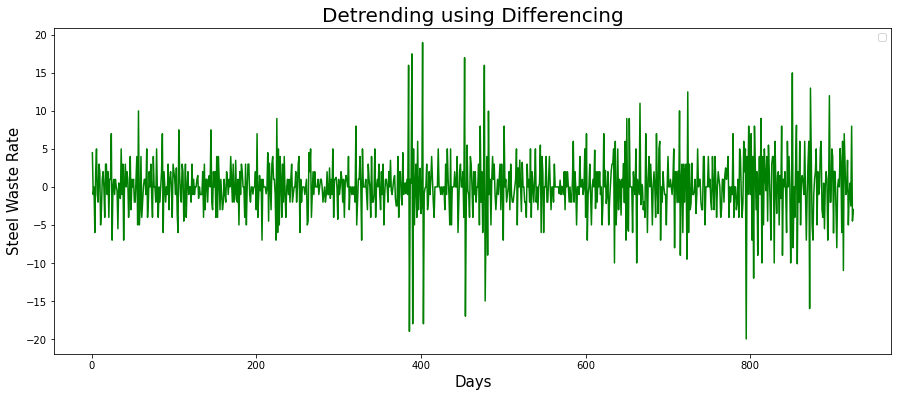

In [75]:
df['diff'] = df['Rate in Rs./Kg.'].diff()
plt.figure(figsize=(15,6))
plt.plot(df['diff'],color='g')
plt.title('Detrending using Differencing', fontsize=20)
plt.xlabel('Days', fontsize=15)
plt.ylabel('Steel Waste Rate', fontsize=15)
plt.legend()
plt.show()


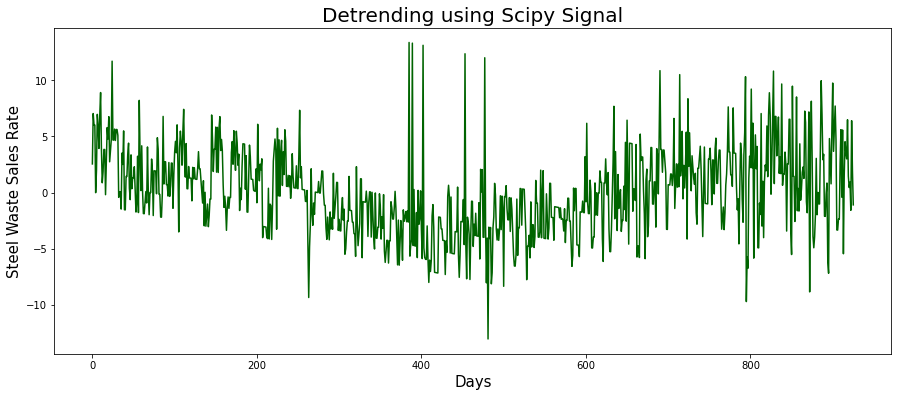

In [76]:
from scipy import signal
import warnings
warnings.filterwarnings("ignore")
df['detrended'] = signal.detrend(df['Rate in Rs./Kg.'].values)
plt.figure(figsize=(15,6))
plt.plot(df['detrended'], color='darkgreen')
plt.xlabel('Days', fontsize =15)
plt.ylabel('Steel Waste Sales Rate', fontsize= 15)
plt.title('Detrending using Scipy Signal', fontsize=20)
plt.show()

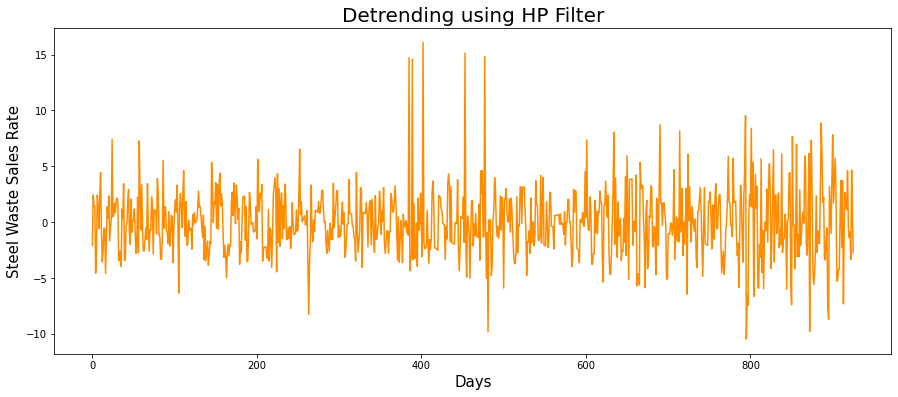

In [77]:
from statsmodels.tsa.filters.hp_filter import hpfilter
import warnings
warnings.filterwarnings("ignore")
sw_cycle,sw_trend = hpfilter(df['Rate in Rs./Kg.'],lamb=1600)
df['hptrend'] = sw_trend
df['hpdetrended'] = df['Rate in Rs./Kg.'] - df['hptrend']
plt.figure(figsize=(15,6))
plt.plot(df['hpdetrended'], color='darkorange')
plt.title('Detrending using HP Filter', fontsize=20)
plt.xlabel('Days', fontsize=15)
plt.ylabel('Steel Waste Sales Rate', fontsize=15)
plt.show()

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 926 entries, 0 to 925
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              926 non-null    datetime64[ns]
 1   Scrape Sale Qty.  926 non-null    float64       
 2   Rate in Rs./Kg.   926 non-null    float64       
 3   Amount in Rs.     926 non-null    float64       
 4   diff              925 non-null    float64       
 5   detrended         926 non-null    float64       
 6   hptrend           926 non-null    float64       
 7   hpdetrended       926 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 58.0 KB


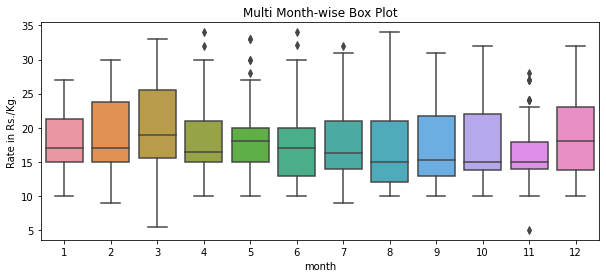

In [79]:
df['month'] = pd.DatetimeIndex(df['Date']).month
plt.figure(figsize=(10,4))
sns.boxplot(x='month', y='Rate in Rs./Kg.', data=df).set_title("Multi Month-wise Box Plot")
plt.show()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

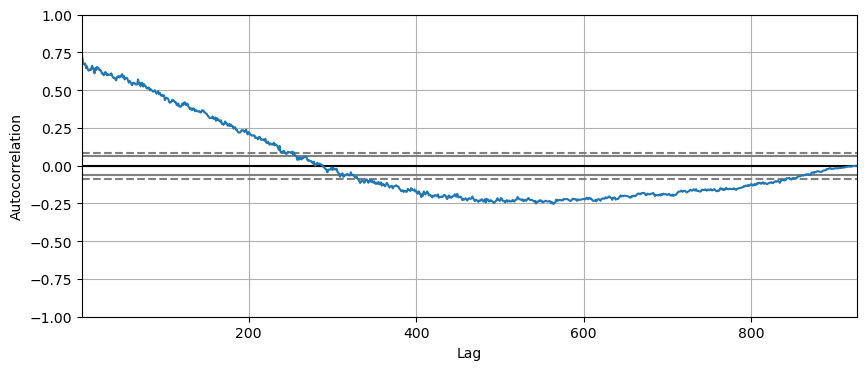

In [80]:
from pandas.plotting import autocorrelation_plot
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(10,4), 'figure.dpi':100})
autocorrelation_plot(df['Rate in Rs./Kg.'].tolist())

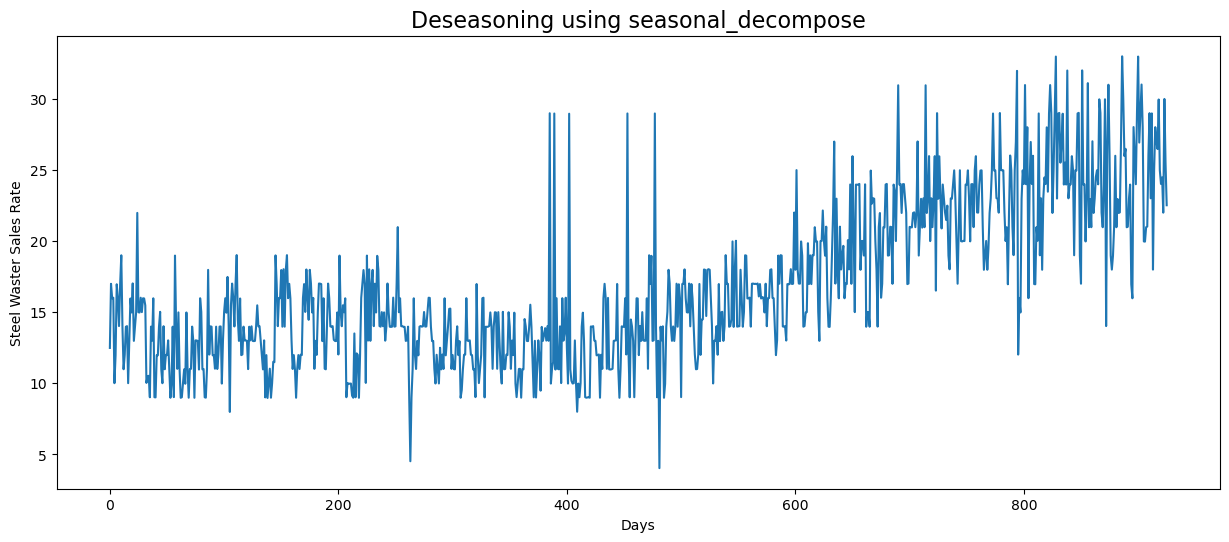

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")
#df = pd.read_excel(r'\Data\India_Exchange_Rate_Dataset.xls',index_col=0,parse_dates=True)
result_mul = seasonal_decompose(df['Rate in Rs./Kg.'],model='multiplicative', extrapolate_trend='freq', freq=12)
deseason = df['Rate in Rs./Kg.'] - result_mul.seasonal
plt.figure(figsize=(15,6))
plt.plot(deseason)
plt.title('Deseasoning using seasonal_decompose', fontsize=16)
plt.xlabel('Days')
plt.ylabel('Steel Waster Sales Rate')
plt.show()

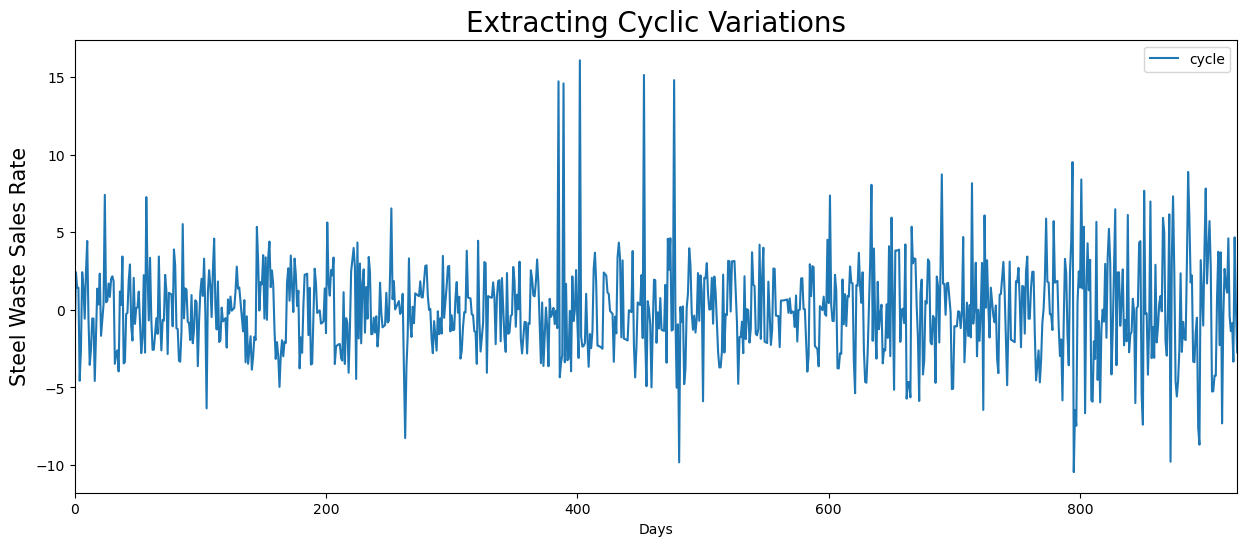

In [82]:
sw_cycle,sw_trend = hpfilter(df['Rate in Rs./Kg.'], lamb=1600)
df['cycle'] =sw_cycle
df['trend'] =sw_trend
df[['cycle']].plot(figsize=(15,6)).autoscale(axis='x',tight=True)
plt.title('Extracting Cyclic Variations', fontsize=20)
plt.xlabel('Days')
plt.ylabel('Steel Waste Sales Rate', fontsize =15)
plt.show()

In [83]:
df.head(5)

,Date,Scrape Sale Qty.,Rate in Rs./Kg.,Amount in Rs.,diff,detrended,hptrend,hpdetrended,month,cycle,trend
0,2018-11-10,149.00,13.50,2011.50,NaN,2.55,15.58,-2.08,11,-2.08,15.58
1,2018-11-02,230.00,18.00,4140.00,4.50,7.03,15.58,2.42,11,2.42,15.58
2,2018-11-13,325.00,17.00,5525.00,-1.00,6.02,15.58,1.42,11,1.42,15.58
3,2018-11-21,350.00,17.00,5950.00,0.00,6.00,15.57,1.43,11,1.43,15.57
4,2018-08-29,250.00,11.00,2750.00,-6.00,-0.01,15.57,-4.57,8,-4.57,15.57


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 926 entries, 0 to 925
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              926 non-null    datetime64[ns]
 1   Scrape Sale Qty.  926 non-null    float64       
 2   Rate in Rs./Kg.   926 non-null    float64       
 3   Amount in Rs.     926 non-null    float64       
 4   diff              925 non-null    float64       
 5   detrended         926 non-null    float64       
 6   hptrend           926 non-null    float64       
 7   hpdetrended       926 non-null    float64       
 8   month             926 non-null    int64         
 9   cycle             926 non-null    float64       
 10  trend             926 non-null    float64       
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 79.7 KB


### Decomposing Time-Series Data
- Additive Models ( y = Trend + Seasonality + Cyclical Component + Irregual Component)
- Multiplicative Models ( y = Trend x Seasonality x Cyclical Component x Irregular Component)

In [85]:
from statsmodels.tsa.seasonal import seasonal_decompose
tsm_decompose = seasonal_decompose(np.array(df['Rate in Rs./Kg.']), model = 'multiplicative', freq = 12)

<Figure size 1500x500 with 0 Axes>

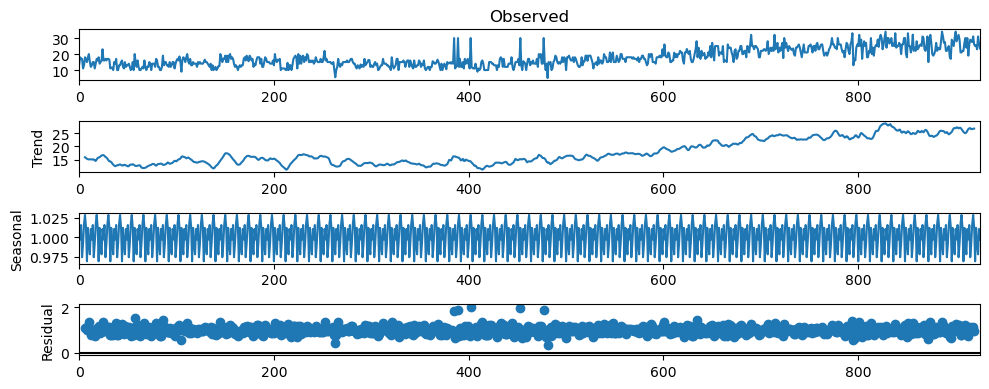

In [86]:
plt.figure(figsize = (15,5))
tsm_plot = tsm_decompose.plot()

In [87]:
df['seasonal'] = tsm_decompose.seasonal
df['trend'] = tsm_decompose.trend

In [88]:
df[30:35]

,Date,Scrape Sale Qty.,Rate in Rs./Kg.,Amount in Rs.,diff,detrended,hptrend,hpdetrended,month,cycle,trend,seasonal
30,2018-11-07,730.00,17.00,12410.00,0.00,5.60,14.84,2.16,11,2.16,14.88,1.03
31,2018-09-05,920.00,16.50,15180.00,-0.50,5.09,14.66,1.84,9,1.84,14.46,1.01
32,2018-08-04,146.00,11.00,1606.00,-5.50,-0.43,14.48,-3.48,8,-3.48,14.42,0.97
33,2018-08-07,100.00,11.52,1152.00,0.52,0.08,14.30,-2.78,8,-2.78,14.17,1.01
34,2018-08-09,110.00,11.52,1267.20,0.00,0.06,14.13,-2.61,8,-2.61,13.63,0.99


In [89]:
df.to_excel('Prod_forecast.xlsx')

### Finding Auto Correlation and Partial Auto-correlation

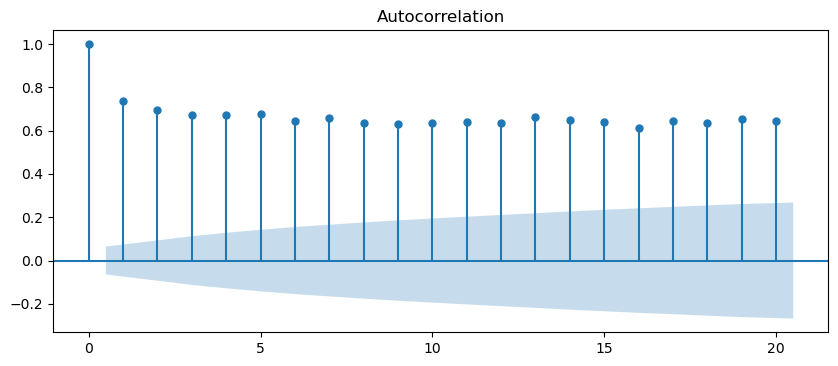

In [90]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_plot = plot_acf(df['Rate in Rs./Kg.'], lags=20)

### Observation : 
- Shaded region shows upper bounday and lower bound where Null-Hypothesis cannot be rejected. Hence only it can be rejected at lag-1
- Hence ACF is significant at lag-1 only

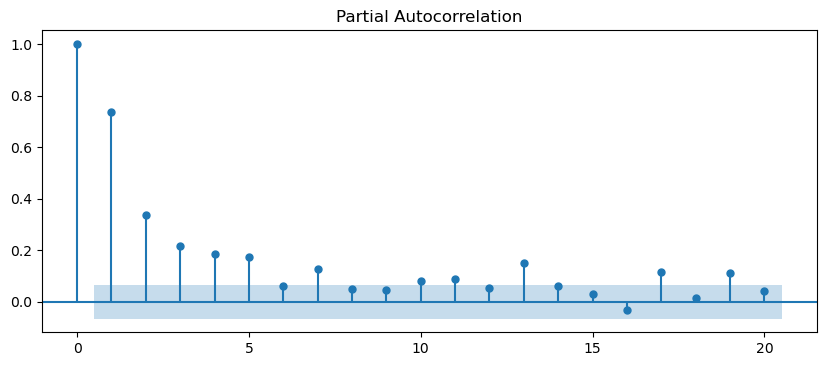

In [91]:
pacf_plot = plot_pacf(df['Rate in Rs./Kg.'], lags=20)

In [92]:
from statsmodels.tsa.arima_model import ARIMA
arima = ARIMA(df['Rate in Rs./Kg.'][0:800].astype(np.float64), order=(1,0,0))
ar_model = arima.fit()


In [93]:
ar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:        Rate in Rs./Kg.   No. Observations:                  800
Model:                     ARMA(1, 0)   Log Likelihood               -2110.325
Method:                       css-mle   S.D. of innovations              3.382
Date:                Sun, 25 Dec 2022   AIC                           4226.651
Time:                        15:22:35   BIC                           4240.704
Sample:                             0   HQIC                          4232.049
                                                                              
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    16.5637      0.358     46.276      0.000      15.862      17.265
ar.L1.Rate in Rs./Kg.     0.6667      0.026     25.232      0.000       0.615       0.719
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4999           +0.0000j            1.4999            0.0000
-----------------------------------------------------------------------------
"""